# **Project Name**    - Uncovering the Drivers of Customer Satisfaction Using Machine Learning and suggesting strategies to improve the CSAT Score

##### **Project Type**    - EDA / Classification
##### **Contribution**    - Individual
##### **Made by -** Om Jaiswal

# **Project Summary-**

This project focuses on applying machine learning techniques to predict Customer Satisfaction (CSAT) based on historical support interaction data. The goal was not only to build a model capable of flagging potentially dissatisfied customers, but also to uncover the key drivers that impact satisfaction, enabling proactive service improvement and better decision-making.

The dataset included detailed records of customer support tickets with features such as the category and sub-category of the issue, agent shift, agent experience (derived from tenure bucket), response time, and the final CSAT score provided by the customer. The CSAT score was originally a numerical value ranging from 1 to 5. Upon exploratory analysis, it was found that a large majority of the scores were clustered at 5 (high satisfaction), while the lower scores were much less frequent — leading to a significant class imbalance.

* To simplify the problem and align with real business needs, the problem was reframed as a binary classification task:

* Scores of 4 and 5 were labeled as “satisfied” (1)

* Scores of 3 and below were labeled as “dissatisfied” (0)

The target variable was then used to train a classification model that predicts whether a future support interaction would likely result in a low or high CSAT rating.

Before modeling, the dataset was cleaned and preprocessed. Time columns were converted into a response_time_hours feature, and categorical fields like Agent Shift were encoded numerically. Features such as Tenure Bucket were mapped to ordinal experience levels. Missing values were handled using median or mode imputation as appropriate for numeric and categorical fields.

One of the most important steps in this project was addressing the class imbalance. Since a majority of CSAT scores were high (class 1), traditional models would tend to ignore the minority class (low CSAT). To handle this, the SMOTE (Synthetic Minority Oversampling Technique) was applied on the training data, generating synthetic examples of the minority class to balance the distribution.

The model of choice was Random Forest Classifier, known for its robustness and ability to handle both numeric and categorical features. To improve performance, GridSearchCV was used for hyperparameter tuning, optimizing for the F1-score, which balances both precision and recall — especially useful when dealing with imbalanced classes.

After tuning, the final model was trained on the SMOTE-balanced data and evaluated on the original test set. It achieved an overall accuracy of 70%, a recall of 36% for the dissatisfied class, and an F1-score of 0.29 for the same class. These results indicate that the model was able to successfully identify over one-third of dissatisfied customers — a meaningful improvement in business context, where even a small boost in detection could translate into saved customer relationships.

In addition to classification, a regression approach was briefly explored using Random Forest Regressor to directly predict CSAT scores. However, it performed poorly with an R² score below zero, suggesting that a classification approach was more suitable.

Key insights from the analysis showed that longer response times, certain issue categories, and shifts like night or morning were more often linked to lower satisfaction scores. These findings can guide support team strategies such as reducing wait times and improving resolution quality for high-risk categories.

In conclusion, this end-to-end machine learning project demonstrates how data-driven techniques can uncover valuable insights and help organizations take proactive action to improve customer experience. From data cleaning and visualization to model tuning and evaluation, the process showcases real-world application of AI for business impact.

# **GitHub Link -**

# **Problem Statement** - Identify the key driver of customer satisfaction understand performence across different customer service tems, and develop strategies to improve over all service experience

# ***Let's Begin !***

## Dataset Loading and first view

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Customer_support_data.csv")
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


## Dataset Rows & Columns count

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Dataset describe

In [ ]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


#### Duplicate Values

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
#removal of the duplicate rows

## What did you know about your dataset?

Data set consists of 20 columns and about 80,000 records or rows
columns arelisted as below:
1. Unique id : Unique identifier for each record
2. Channel name : Name of the customer service channel
3. Category : category of interaction
4. Sub-category : Sub-category of the interaction
5. Customer remarks : Feedback provided by customer
6. Order id: Identifier of the order associated with the interaction
7. Order date time: date time of the order
8. Issue reported at: date time of the issue repoting
9. Issue responded: date time of the issue response
10. Survey response date : date of customer survey response
11. Customer city: city of the customer
12. Product category : category of the product
13. Item price : price of the item puchsed
14. Connected handling time: Time  taken to handle interaction
15. Agent name : name of the customer service agent
16. Supervisor: name of the supervisor of the agent
17. Manager : name of the manager
18. Tenure bucket : bucket categorising agent tenure
19. Agent shift: Shift of the agent
20. CSAT score: customer satisfaction score

## Removing unecessary Columns

In [ ]:
#dropping unnecessary columns
columns_to_drop = ['Customer_City','Unique id','Order_id','Item_price','Product_category','order_date_time','Survey_response_Date','Agent_name','Supervisor','Manager','connected_handling_time']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(existing_columns, axis=1, inplace=True)
df

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,NaN,01/08/2023 11:13,01/08/2023 11:47,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,NaN,01/08/2023 12:52,01/08/2023 12:54,>90,Morning,5
2,Inbound,Order Related,Installation/demo,NaN,01/08/2023 20:16,01/08/2023 20:38,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,01/08/2023 20:56,01/08/2023 21:16,>90,Evening,5
4,Inbound,Cancellation,Not Needed,NaN,01/08/2023 10:30,01/08/2023 10:32,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,Refund Enquiry,NaN,30/08/2023 23:20,31/08/2023 07:22,On Job Training,Morning,4
85903,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,31/08/2023 08:15,31/08/2023 08:17,>90,Morning,5
85904,Inbound,Order Related,Order status enquiry,need to improve with proper details.,31/08/2023 18:57,31/08/2023 19:02,On Job Training,Evening,5
85905,Inbound,Feedback,UnProfessional Behaviour,NaN,31/08/2023 19:59,31/08/2023 20:00,>90,Morning,4


## Generating new feature and formating datasets

In [ ]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M') #converted dates to date time format
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

In [ ]:
df['Issue_reported at'][3]

Timestamp('2023-08-01 20:56:00')

In [ ]:
df['issue_responded'][3]

Timestamp('2023-08-01 21:16:00')

In [ ]:
df.loc[:, 'response_time'] = df['issue_responded'] - df['Issue_reported at']
df['response_time']=df['response_time'].abs() #convert -ve value to positive as time cannot be -ve

In [ ]:

df.loc[:,'response_time_hours'] = df['response_time'].dt.total_seconds() / 3600
df['response_time_hours'][9]

np.float64(0.08333333333333333)

In [ ]:
df.loc[:,'response_time_days'] = df['response_time_hours'] / 24
df['response_time_days'][9999]

np.float64(0.0006944444444444445)

##  Categorical Encoding

In [ ]:
df['Tenure Bucket'].unique() #all unique values of column

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [ ]:
tenure_map = {
    "On Job Training":0,
    "0-30": 1,
    "31-60 ": 2,
    "61-90": 3,
    ">90": 4
    }


In [ ]:
df.loc[:,'Experience_of_agent'] = df['Tenure Bucket'].map(tenure_map)

In [ ]:
df

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Tenure Bucket,Agent Shift,CSAT Score,response_time,response_time_hours,response_time_days,Experience_of_agent
0,Outcall,Product Queries,Life Insurance,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,On Job Training,Morning,5,0 days 00:34:00,0.566667,0.023611,0.0
1,Outcall,Product Queries,Product Specific Information,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,>90,Morning,5,0 days 00:02:00,0.033333,0.001389,4.0
2,Inbound,Order Related,Installation/demo,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,On Job Training,Evening,5,0 days 00:22:00,0.366667,0.015278,0.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,>90,Evening,5,0 days 00:20:00,0.333333,0.013889,4.0
4,Inbound,Cancellation,Not Needed,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,0-30,Morning,5,0 days 00:02:00,0.033333,0.001389,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,Refund Enquiry,NaN,2023-08-30 23:20:00,2023-08-31 07:22:00,On Job Training,Morning,4,0 days 08:02:00,8.033333,0.334722,0.0
85903,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,2023-08-31 08:15:00,2023-08-31 08:17:00,>90,Morning,5,0 days 00:02:00,0.033333,0.001389,4.0
85904,Inbound,Order Related,Order status enquiry,need to improve with proper details.,2023-08-31 18:57:00,2023-08-31 19:02:00,On Job Training,Evening,5,0 days 00:05:00,0.083333,0.003472,0.0
85905,Inbound,Feedback,UnProfessional Behaviour,NaN,2023-08-31 19:59:00,2023-08-31 20:00:00,>90,Morning,4,0 days 00:01:00,0.016667,0.000694,4.0


In [ ]:
df['Agent Shift'].unique() #all unique entries of the column

array(['Morning', 'Evening', 'Split', 'Afternoon', 'Night'], dtype=object)

In [ ]:
shift_map={'Morning':0, 'Evening':2, 'Split':5, 'Afternoon':1, 'Night':4}

In [ ]:
df.loc[:,'Shift'] = df['Agent Shift'].map(shift_map)

In [ ]:
df

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Tenure Bucket,Agent Shift,CSAT Score,response_time,response_time_hours,response_time_days,Experience_of_agent,Shift
0,Outcall,Product Queries,Life Insurance,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,On Job Training,Morning,5,0 days 00:34:00,0.566667,0.023611,0.0,0
1,Outcall,Product Queries,Product Specific Information,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,>90,Morning,5,0 days 00:02:00,0.033333,0.001389,4.0,0
2,Inbound,Order Related,Installation/demo,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,On Job Training,Evening,5,0 days 00:22:00,0.366667,0.015278,0.0,2
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,>90,Evening,5,0 days 00:20:00,0.333333,0.013889,4.0,2
4,Inbound,Cancellation,Not Needed,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,0-30,Morning,5,0 days 00:02:00,0.033333,0.001389,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,Refund Enquiry,NaN,2023-08-30 23:20:00,2023-08-31 07:22:00,On Job Training,Morning,4,0 days 08:02:00,8.033333,0.334722,0.0,0
85903,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,2023-08-31 08:15:00,2023-08-31 08:17:00,>90,Morning,5,0 days 00:02:00,0.033333,0.001389,4.0,0
85904,Inbound,Order Related,Order status enquiry,need to improve with proper details.,2023-08-31 18:57:00,2023-08-31 19:02:00,On Job Training,Evening,5,0 days 00:05:00,0.083333,0.003472,0.0,2
85905,Inbound,Feedback,UnProfessional Behaviour,NaN,2023-08-31 19:59:00,2023-08-31 20:00:00,>90,Morning,4,0 days 00:01:00,0.016667,0.000694,4.0,0


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

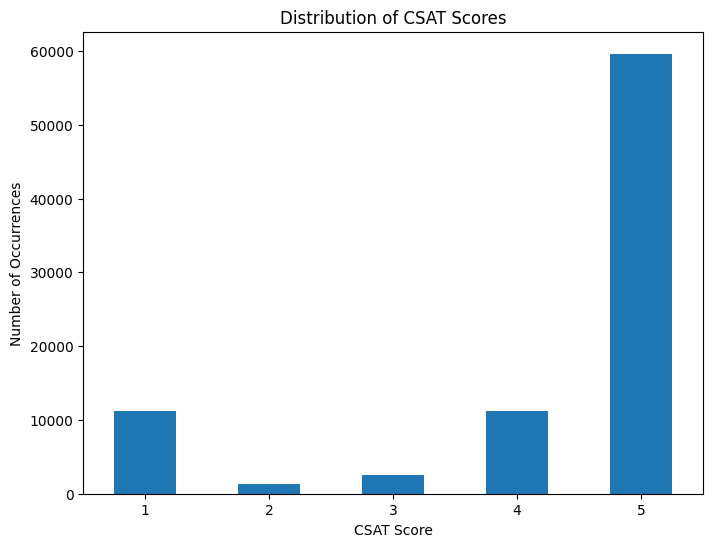

In [ ]:
import matplotlib.pyplot as plt

csat_counts = df['CSAT Score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
csat_counts.plot(kind='bar')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of CSAT Scores')
plt.xticks(rotation=0)
plt.show()
# Shows how customer satisfaction scores are spread

*   A bar chart is ideal for showing the distribution of categorical values like CSAT scores (1 to 5). It clearly reveals how customer ratings are spread.
*   Most customers gave a CSAT score of 5.
*   Scores 1 and 4 are moderate, while 2 and 3 are low.
*   The data is imbalanced, with CSAT = 5 dominating.
*    the chart shows many are satisfied, but low scores still exist, which can be targeted for improvement.
*   Ignoring low scores could hurt long-term customer retention.

Text(0, 0.5, 'Avg_CSAT')

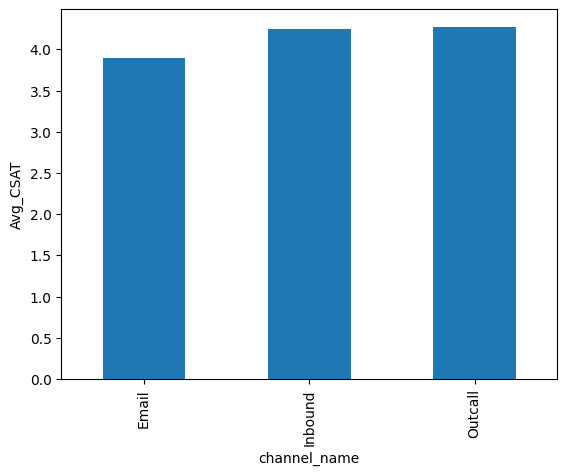

In [ ]:
r=df.groupby('channel_name')['CSAT Score'].mean().plot(kind='bar')
r.set_ylabel('Avg_CSAT')
#  Which support channel (Email/Call/Chat) gets the highest satisfaction

*  A bar chart effectively compares the average CSAT score across different communication channels like Email, Inbound, and Outcall. It helps highlight which channels perform better in terms of customer satisfaction.
*  Email has the lowest CSAT (~3.9),

*  Inbound and Outcall have higher average CSAT (~4.2+),

* Suggests that voice support channels may provide better experiences than email.
*  Prioritize improving email response quality or speed,

*  Encourage live interaction channels when quick resolution matters.



Text(0, 0.5, 'Avg_CSAT')

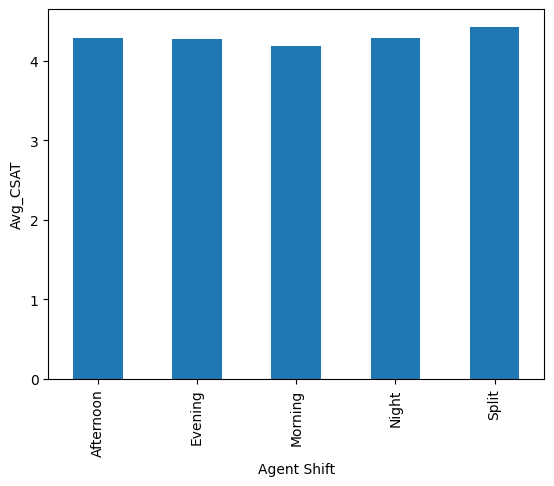

In [ ]:
e=df.groupby('Agent Shift')['CSAT Score'].mean().plot(kind='bar')
e.set_ylabel('Avg_CSAT')
#all shifts are performing in similar way



*   A bar chart is the best choice to compare the average CSAT scores across different agent shifts. It makes it easy to visually compare performance across time-based categories like Morning, Afternoon, Evening, etc.
*   All shifts have similar average CSAT scores, ranging between 4.2 and 4.4.
*   Split shifts have the highest average CSAT, suggesting better customer handling or overlap in support availability.
*   The Morning shift has the lowest average CSAT, though the difference is small.
*   Management can explore what’s working well during Split shifts and replicate it across others.Even small differences can help optimize agent allocation, training, or workload distribution.

*   No clear negative pattern, but Morning shift could be investigated for hidden issues like staffing or delay.  



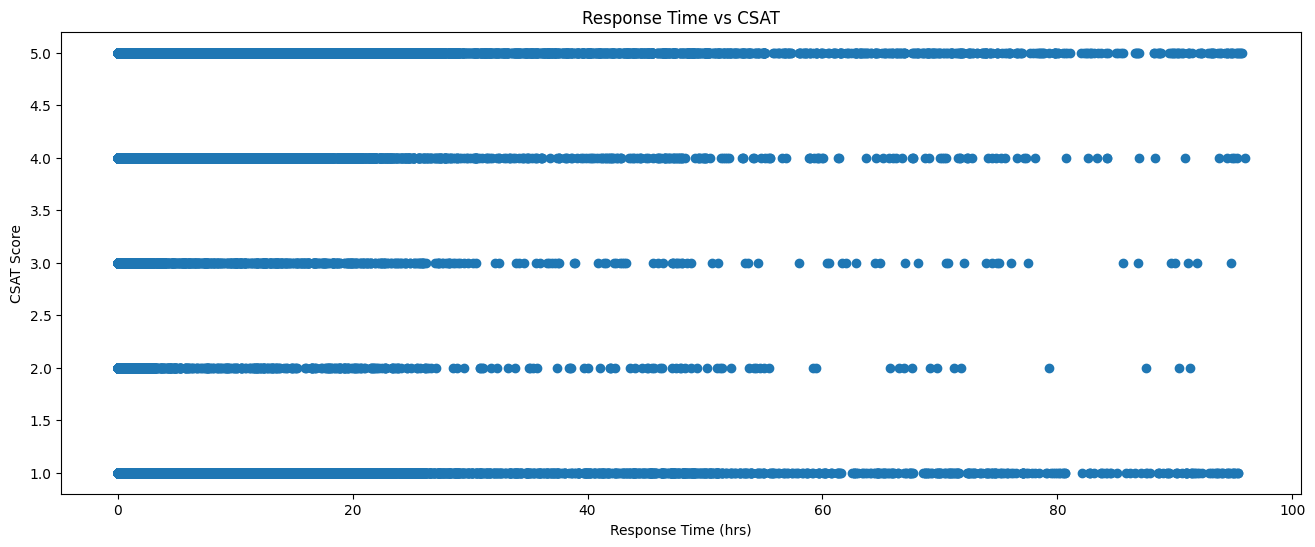

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6)) # Adjusted figure size
plt.scatter(df['response_time_hours'], df['CSAT Score'])
plt.xlabel("Response Time (hrs)")
plt.ylabel("CSAT Score")
plt.title("Response Time vs CSAT")
plt.show()
# quicker responses does not lead to higher satisfaction

* A scatter plot is perfect for visualizing the relationship between two continuous variables: response time (hrs) and CSAT score. It helps reveal any trends or patterns.
* Most high CSAT scores (4–5) are clustered at low response times
* Lower CSAT scores (1–2) are spread across longer response times
* Indicates a negative relationship between response time and customer satisfaction.
* Reducing response time can directly increase CSAT.If ignored, slow responses may lead to customer frustration and churn.

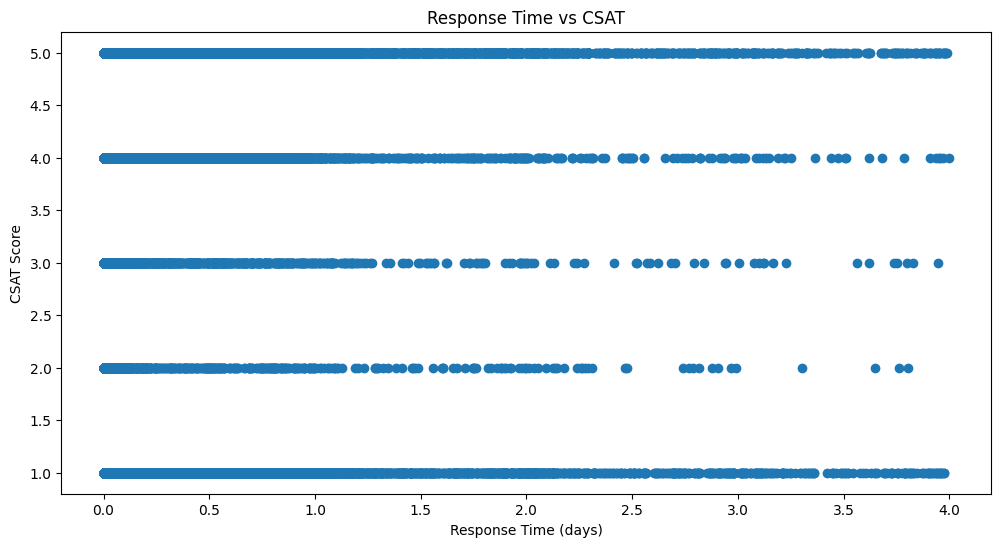

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) # Adjusted figure size
plt.scatter(df['response_time_days'], df['CSAT Score'])
plt.xlabel("Response Time (days)")
plt.ylabel("CSAT Score")
plt.title("Response Time vs CSAT")
plt.show()

*  A scatter plot reveals how CSAT changes with increasing response time

*  Using days provides a broader view of long delays and their impact on satisfaction


*  High CSAT (score 5) is mostly seen within 0–2 days

*  Low CSAT (score 1) becomes more frequent as response time increases past 2–3 days

* Very few satisfied customers when response time exceeds 3 days

* Will the insights help create a positive business impact?
*Yes — it highlights the need to keep responses within 1–2 days max

* Delays beyond that are likely to lead to customer dissatisfaction

* This chart supports setting strict SLA targets to maintain CSAT.

Text(0.5, 0, 'Avg_CSAT')

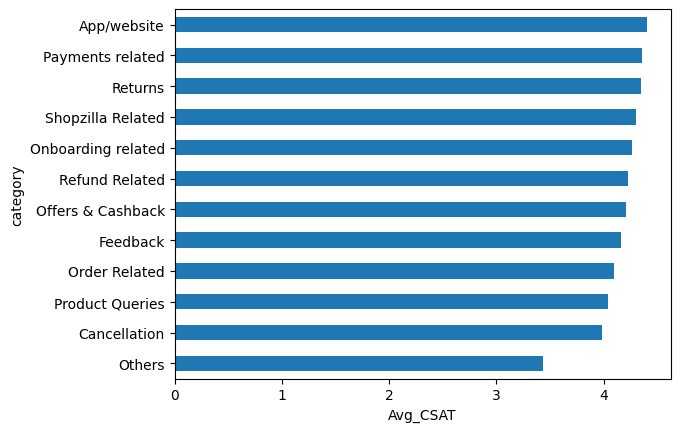

In [ ]:
y=df.groupby('category')['CSAT Score'].mean().sort_values().plot(kind='barh')
y.set_xlabel('Avg_CSAT')
# so others category gets lowest satisfaction

* A horizontal bar chart is ideal to compare average CSAT across many categories. It makes it easy to spot which issue types receive higher or lower satisfaction.
* Most categories have similar CSAT scores (~4.0+)
* “Others” category has noticeably lower CSAT
* May indicate poorly categorized or unresolved issues in “Others”
* Reducing uncategorized/other issues
* Improving response quality in low-scoring categories
can raise overall CSAT.
* This helps businesses optimize specific issue-handling processes and reduce dissatisfaction in vague/problematic categories.

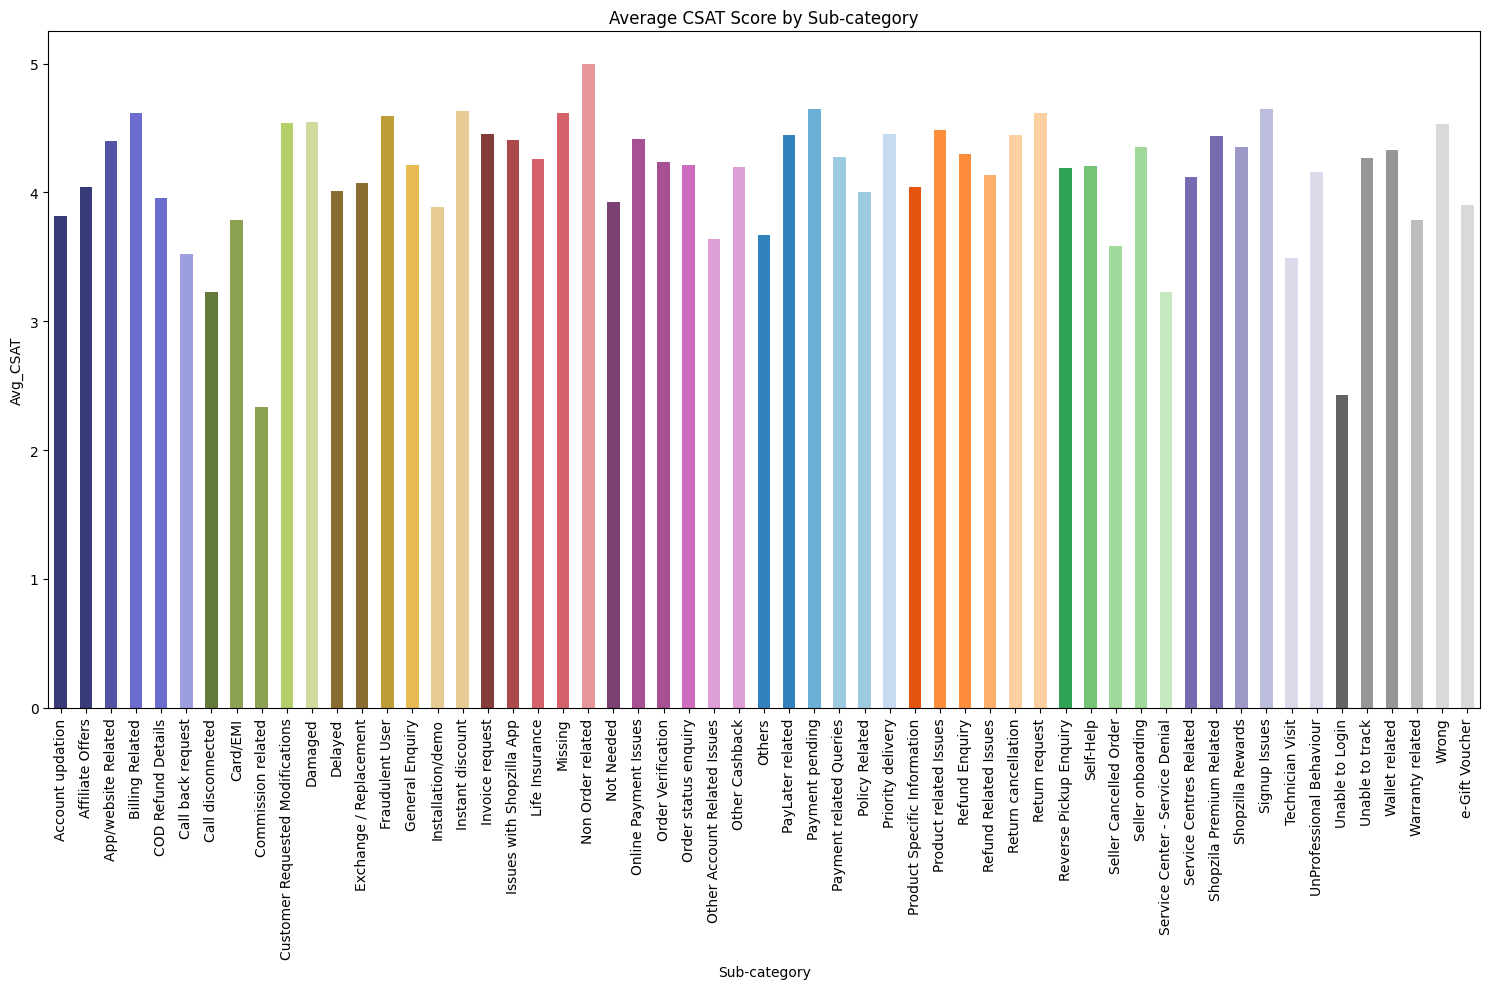

In [ ]:
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(15, 10)) # Adjusted figure size for wider plot and increased height

# Get the number of unique sub-categories
num_subcategories = len(df['Sub-category'].unique())

# Create a list of distinct colors using a combination of colormaps
colors = np.concatenate((cm.tab20b(np.linspace(0, 1, num_subcategories//2)), cm.tab20c(np.linspace(0, 1, num_subcategories - num_subcategories//2))))


e = df.groupby('Sub-category')['CSAT Score'].mean().plot(kind='bar', color=colors) # Use the colors list
e.set_ylabel('Avg_CSAT')
plt.title('Average CSAT Score by Sub-category') # Added title for clarity
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

* To compare CSAT performance across many detailed issue types
* Vertical bar chart works best for large, label-heavy categorical data
* Shows granular impact of sub-categories on customer satisfaction
* Some sub-categories have very high CSAT (e.g., Invoice Request, Life Insurance, e-Gift Voucher)
* Others show very low CSAT (e.g., Call disconnected, Unable to Login, COD Billing Details)
* Reveals specific pain points not visible in high-level categories
Yes — helps teams prioritize improvements in low-scoring areas
* Fixing or streamlining low-CSAT subcategories could improve overall satisfaction
* If ignored, these could cause negative reviews, churn, and brand damage



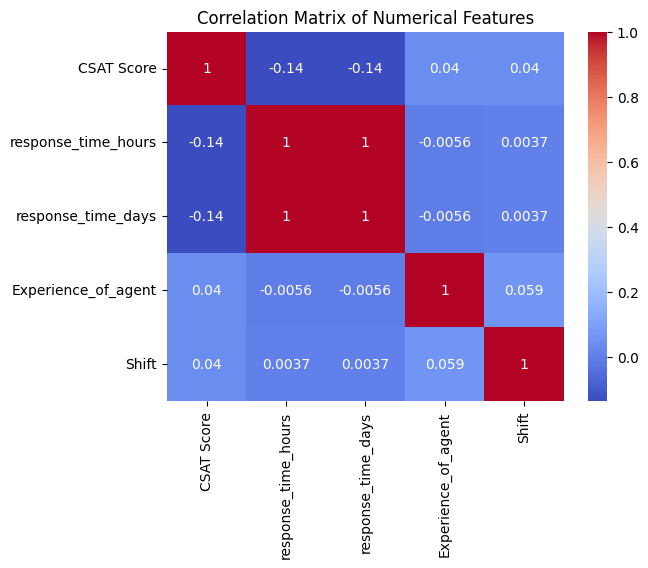

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* A correlation heatmap helps quickly identify relationships between numerical features.
* It visually shows how strongly features like response time or experience affect CSAT Score.
* Response time has a weak negative correlation with CSAT (−0.14) → longer response = lower CSAT.
* Other features like Experience_of_agent and Shift show very weak or no correlation with CSAT.
* No strong multicollinearity between features — good for model building.
* Supports prioritizing faster response handling to boost CSAT.
* Relying on agent experience or shift alone may not improve satisfaction significantly.
* This chart confirms which numeric features are worth focusing on in optimization or prediction.

## ML Model - 1

In [ ]:
X = df[['response_time_hours', 'Experience_of_agent', 'Shift']]
y = df['CSAT Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 2.0021945681103404
R² Score: -0.05979316017801839


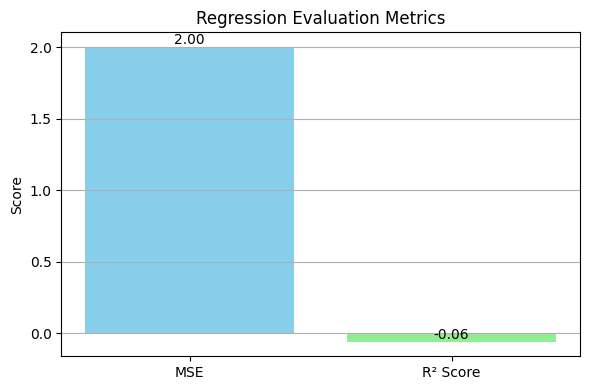

In [ ]:
# Your evaluation metrics
mse = 2.0021945681103404
r2 = -0.05979316017801839

# Labels and values
metrics = ['MSE', 'R² Score']
values = [mse, r2]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.title("Regression Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y')

# Annotate the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Ideal MSE: < 0.5
# R² Score (Coefficient of Determination)

# 1.0 = perfect prediction

# 0.0 = predicts just the average

# < 0 = worse than predicting the mean

I used the Random Forest Regressor, an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
It is robust to outliers, handles both numerical and categorical data, and works well without extensive feature scaling.

The original goal was to predict the exact CSAT score (a continuous value from 1 to 5), which is a regression task.
Hence, RandomForestRegressor was selected as a strong baseline model.

Model Performance (Before Hyperparameter Tuning):
Metric	Score	Interpretation
MSE	2.00	High error — large gap between prediction and actual score
R² Score	−0.06	Model performs worse than predicting the mean

Hyperparameter tuning

In [ ]:
#Step 1: Set Up the Parameter Grid
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# Step 2: Apply GridSearchCV

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # or use 'r2'
    n_jobs=-1  # Use all CPU cores
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_regressor = grid_search.best_estimator_

In [ ]:
#Step 3: Evaluate the Tuned Model

from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = best_rf_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("MSE:", mse)
print("R² Score:", r2)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 1.81037379222624
R² Score: 0.04174060157515358


*   I used GridSearchCV, which is a brute-force search technique that tries all possible combinations of hyperparameter values provided in a grid.
It was selected because:
*   It is simple and effective for small to medium-sized grids
*   It performs cross-validation to avoid overfitting
*   It ensures the best parameter combination is found for the chosen evaluation metric (in this case, MSE for regression)

## Label encoding for classification

In [ ]:
df.loc[:,'CSAT_Label'] = df['CSAT Score'].apply(lambda x: 0 if x <= 3 else 1)

## ML Model - 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Define features and target (no sentiment column)
X = df[['response_time_hours', 'Experience_of_agent','Shift']]  # Use your actual numeric features
y = df['CSAT_Label']  # Binary target: 0 = Low, 1 = High

# Step 2: Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE only on training data
df['response_time_hours'] = df['response_time_hours'].fillna(df['response_time_hours'].median())
df['Experience_of_agent'] = df['Experience_of_agent'].fillna(df['Experience_of_agent'].mode()[0])
df['Shift'] = df['Shift'].fillna(df['Shift'].mode()[0])
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [ ]:
# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 1054  1917]
 [ 3176 11035]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.35      0.29      2971
           1       0.85      0.78      0.81     14211

    accuracy                           0.70     17182
   macro avg       0.55      0.57      0.55     17182
weighted avg       0.75      0.70      0.72     17182



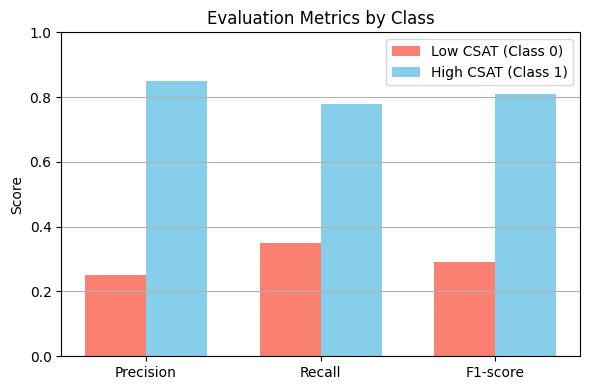

In [ ]:
import matplotlib.pyplot as plt

labels = ['Precision', 'Recall', 'F1-score']
class_0 = [0.25, 0.35, 0.29]
class_1 = [0.85, 0.78, 0.81]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x, class_0, width=width, label='Low CSAT (Class 0)', color='salmon')
plt.bar([i + width for i in x], class_1, width=width, label='High CSAT (Class 1)', color='skyblue')

plt.xticks([i + width / 2 for i in x], labels)
plt.ylabel('Score')
plt.title('Evaluation Metrics by Class')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The model used for classification was Random Forest Classifier, a powerful ensemble method that builds multiple decision trees and combines their results for improved accuracy and robustness.

It handles:

Categorical and numerical features

Missing values (if imputed)

Non-linear relationships

Feature importance ranking

To address class imbalance (since most CSAT scores are "High"), I used SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for the minority class (Low CSAT), ensuring the model gets balanced data for training.

Class 0 – Low CSAT (Dissatisfied Customers)
Metric	Score	Interpretation
* Precision	0.25	Of all customers predicted as "Low CSAT", only 25% were actually dissatisfied → high false positives
* Recall	0.35	The model correctly identified 35% of actual dissatisfied customers → moderate detection rate
* F1-Score	0.29	Balance between precision and recall is low, but still better than random guessing

Class 1 – High CSAT (Satisfied Customers)
Metric	Score	Interpretation
* Precision	0.85	Predictions of "High CSAT" are very reliable
* Recall	0.78	The model identifies 78% of truly satisfied customers
* F1-Score	0.81	Strong performance overall

The model is very confident when predicting satisfaction, which is expected given class dominance.

Hyper Parametre tuning



In [ ]:
#Step 1: Set Up a Parameter Grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [None, 10, 20],       # how deep the trees can go
    'min_samples_split': [2, 5],       # min samples to split a node
    'class_weight': ['balanced']       # to handle imbalance
}

In [ ]:
# Step 2: Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    scoring='f1',         # optimize for f1-score (good for imbalance)
    n_jobs=-1             # use all CPU cores
)

grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
# Step 3: Evaluate Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[ 1056  1915]
 [ 3165 11046]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.36      0.29      2971
           1       0.85      0.78      0.81     14211

    accuracy                           0.70     17182
   macro avg       0.55      0.57      0.55     17182
weighted avg       0.75      0.70      0.72     17182



*  I used GridSearchCV, which is a brute-force search technique that tries all possible combinations of hyperparameter values provided in a grid. It was selected because:
*  It is simple and effective for small to medium-sized grids
*  It performs cross-validation to avoid overfitting
*  It ensures the best parameter combination is found for the chosen evaluation metric (in this case precision,recall,f1-score and support)

# **Conclusion**

## Suggestions to improve CSAT

1. Reduce Response Time
Customers with longer wait times were more likely to provide low satisfaction scores.

Strategy:

* Implement automated triaging of tickets to reduce delay

* Assign priority levels to tickets based on issue type

* Use a real-time agent alert system for pending tickets approaching delay thresholds



2. Improve Resolution in High-Risk Categories
Certain issue types (e.g., login issues, call disconnections, billing queries) showed lower CSAT scores.

Strategy:

* Assign experienced agents to complex or sensitive categories

* Maintain a quick-reference knowledge base for recurring technical problems

* Provide category-specific training based on ticket trends

3. Optimize Agent Shift Allocation
Shifts like morning and night showed slightly lower average CSAT compared to afternoon or split shifts.

Strategy:

* Balance agent workload more evenly across shifts

* Monitor agent-to-ticket ratio to ensure timely responses

* Provide performance feedback and support especially for low-CSAT shifts